In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Queueing simulation
## Exponential random draws

In [2]:
def exponential_rng(lam=1.0):  
    """ Generates exponential random number.
    
    Keywords:
        lam (float): the rate parameter, the inverse expectation of the distribution.
    
    Returns:
        exponential random number with given rate.
    """
    return -np.log(np.random.rand()) / lam

## Define events

In [3]:
# GENERATION
class Generation:
    def __init__(self, lam):
        self.lam = lam
        self.time = 0
    def generate(self):
        self.time += exponential_rng(self.lam)
# ARRIVAL
class Arrival:
    def __init__(self, t0):
        self.t0 = t0
    def travel(self):
        self.tt = self.t0 * np.random.rand()
# DEPARTURE
class Departure:
    def __init__(self, mu):
        self.mu = mu
    def depart(self):
        self.time = exponential_rng(self.mu)

## Define scenario

In [4]:
class Scenario:
    """ Road scenario
    
    Attributes:
        demand duration (float): Duration of vehicle generation.
        t0 (float): Free-flow travel time.
        lam (float): Entry rate.
        mu (float): Service rate.
    """
    ""
    def __init__(self, 
                 demand_duration=50.0,
                 t0=1.0,
                 lam=1.0,
                 mu=1.0,
                ):
        self.demand_duration = demand_duration
        self.t0 = t0
        self.lam = lam
        self.mu = mu

## Define simulation procedure

In [5]:
def simulate(scenario):
    """ Implements the simulation procedure.
    
    Keywords:
        scenario (Scenario): Road scenario.
    
    Returns:
        times (list): Event times. 
        queues (list): Queue length over time. 
    """
    times = [0]
    queues = [0]
    As, Ds = [], []
    # Time variable
    t = 0
    # Counter variables
    NA, ND = 0, 0
    # System state variable
    n = 0
    # Event list
    EL = [0, np.inf]
    demand_duration = scenario.demand_duration
    # Initialization of the simulation
    generation = Generation(scenario.lam)
    Ts = []
    while True:
        # Create generation event
        generation.generate()
        tg = generation.time
        # Create arrival event
        arrival = Arrival(scenario.t0)
        arrival.travel()
        tt = arrival.tt
        ta = tg + tt
        Ts.append(ta)
        if ta > demand_duration:
            break
    Ts.sort()
    Ts = iter(Ts)
    T0 = next(Ts)
    EL[0] = T0
    while True:
        if (EL[0] <= EL[1]) & (EL[0] <= demand_duration):
            # Reset
            t = EL[0]
            n += 1
            NA += 1
            # Collect
            times.append(t)
            As.append(t)
            queues.append(n)
            # Generate an arrival
            Tt = next(Ts)
            EL[0] = Tt
            if n == 1:
                # Generate first departure
                departure = Departure(scenario.mu)
                departure.depart()
                td = t + departure.time
                EL[1] = td
        elif (EL[1] <= EL[0]) & (EL[1] <= demand_duration):
            # Reset
            t = EL[1]
            n -= 1
            ND += 1
            # Collect
            times.append(t)
            Ds.append(t)
            queues.append(n)
            if n > 0:
                # Generate a departure
                departure = Departure(scenario.mu)
                departure.depart()
                td = t + departure.time
                EL[1] = td
            else:
                # Queue is empty
                td = np.inf
                EL[1] = td
        elif (EL[0] > demand_duration) | (EL[1] > demand_duration):
            if n > 0:
                # Reset
                t = EL[1]
                n -= 1
                ND += 1
                # Collect
                times.append(t)
                Ds.append(t)
                queues.append(n)
                while n > 0:
                    # Generate a departure
                    departure = Departure(scenario.mu)
                    departure.depart()
                    td = t + departure.time
                    EL[1] = td
                    # Reset
                    t = EL[1]
                    n -= 1
                    ND += 1
                    # Collect
                    times.append(t)
                    queues.append(n)
                    Ds.append(t)
            else:
                print(t)
                break
    print(f'***{NA, ND}')
    return times, queues, np.array(As), np.array(Ds)

## Run simulation

49.89068069354923
***(52, 52)


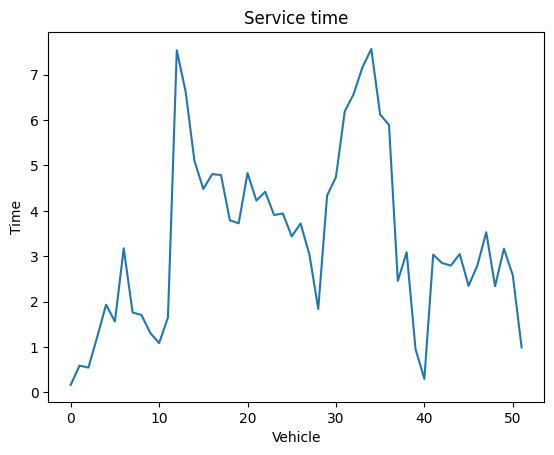

In [6]:
np.random.seed(123)
times, queues, As, Ds = simulate(Scenario())
fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.plot(Ds-As)
ax.set(title='Service time', xlabel='Vehicle', ylabel='Time')
plt.show()

## Repeat the simulation multiple times

In [7]:
D = 3
np.random.seed(1990)
times_queues = [simulate(Scenario()) for d in range(D)]

60.58894274928006
***(58, 58)
51.30247845784708
***(41, 41)
58.134614805417584
***(56, 56)


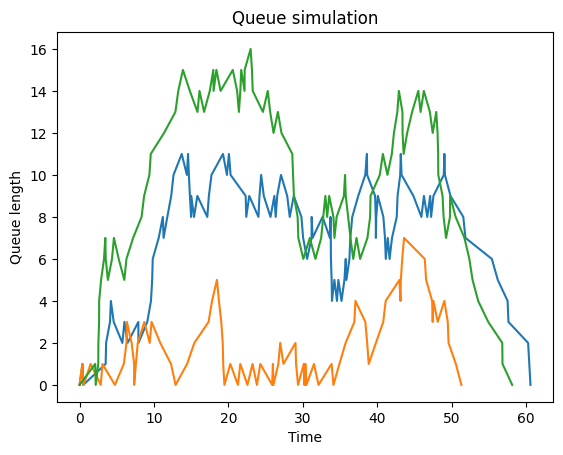

In [8]:
fig = plt.figure()
ax = plt.subplot(1, 1, 1)

for t, q, _, _ in times_queues:
    ax.plot(t, q)
ax.set(title='Queue simulation', xlabel='Time', ylabel='Queue length')
#fig.savefig('figure_queue_simulation.pdf', dpi=300)
plt.show()